In [2]:
from sklearn import preprocessing
import os
import pandas as pd

In [6]:
# Ruta del fichero de datos normotipicos
file = "../DatosTestNormotipicos/31Jul24-EjemploSPSS.xlsx"

# Cargamos el fichero en un DataFrame
df_normotipicos = pd.read_excel(file)


In [ ]:
df_normotipicos.head()

,testID,MenorID,A1,A10,A100,A101,A102,A103,A104,A105,...,Antecedentesfamiliares,Familiaresdomicilio,Familiarescondiscapacidad,Nivelescolarización,Observacionesescolarización,Enfermedadesrelevantes,Motivovaloración,ResultadotestApgar,Adopción,ObservacionesJuicioclínico
0,193,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No informado,NaN,NaN,No informado,NaN,NaN,NaN,NaN,0.0,NaN
1,238,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No informado,NaN,NaN,Educación Infantil (1-2 año,NaN,NaN,NaN,NaN,0.0,NaN
2,266,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No informado,3.0,NaN,No escolarizado,NaN,NaN,NaN,9.0,0.0,NaN
3,294,381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No informado,3.0,tumor superado en los ganglios el padre,Educación Infantil (1-2 año,NaN,NaN,NaN,NaN,0.0,NaN
4,297,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No informado,4.0,NaN,Educación Infantil (1-2 año,NaN,NaN,NaN,9.0,0.0,NaN


Para limpiar los datos, primero filtraremos por las columnas que contengan menos del 5% de las filas rellenas

In [7]:
# Calcular el porcentaje de valores no nulos en cada columna
porcentaje_no_nulos = df_normotipicos.notnull().mean()

# Mostrar columnas con menos del 5% de valores no nulos
columnas_poco_informativas = porcentaje_no_nulos[porcentaje_no_nulos < 0.05].index

# Convertir el índice a una lista para mostrarlo mejor
columnas_poco_informativas_lista = columnas_poco_informativas.tolist()

# Mostrar todas las columnas poco informativas
print("Columnas con menos del 5% de valores no nulos:")
print(columnas_poco_informativas_lista)

print("Numero de columnas con menos del 5% de valores no nulos")
print(len(columnas_poco_informativas_lista))

Columnas con menos del 5% de valores no nulos:
['A104', 'A108', 'A109', 'A112', 'A113', 'A114', 'A115', 'A117', 'A118', 'A119', 'A120', 'A121', 'A122', 'A123', 'A124', 'A125', 'A127', 'A128', 'A129', 'A130', 'A134', 'A137', 'A138', 'A139', 'A141', 'A145', 'A146', 'A147', 'A149', 'A151', 'A153', 'A154', 'A155', 'A158', 'A159', 'A16', 'A160', 'A164', 'A170', 'A171', 'A172', 'A175', 'A176', 'A177', 'A179', 'A18', 'A180', 'A181', 'A183', 'A186', 'A187', 'A188', 'A189', 'A190', 'A191', 'A192', 'A193', 'A195', 'A196', 'A199', 'A200', 'A203', 'A205', 'A206', 'A209', 'A21', 'A210', 'A216', 'A217', 'A218', 'A219', 'A22', 'A220', 'A224', 'A225', 'A23', 'A24', 'A271', 'A318', 'A319', 'A3221', 'A35', 'A37', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A47', 'A48', 'A51', 'A53', 'A54', 'A56', 'A57', 'A58', 'A59', 'A61', 'A62', 'A63', 'A64', 'A67', 'A72', 'A73', 'A75', 'A76', 'A77', 'A80', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A91', 'A95', 'AMF163', 'CA271', 'LA175', 'LA279',

In [ ]:
porcentaje_no_nulos

testID                        1.000000
MenorID                       1.000000
A1                            0.211599
A10                           0.211599
A100                          0.136364
                                ...   
Enfermedadesrelevantes        0.131661
Motivovaloración              0.523511
ResultadotestApgar            0.266458
Adopción                      0.949843
ObservacionesJuicioclínico    0.050157
Length: 1783, dtype: float64

In [8]:
# Definir las áreas de estudio
areas_estudio = {
    'L': 'Lenguaje',
    'A': 'Adaptativa',
    'MG': 'Motricidad_gruesa',
    'MF': 'Motricidad_fina',
    'S': 'Social',
    'C': 'Cognitiva',
}

In [9]:
# Definimos los rangos de edad
rangos_edad = {
    "primer mes": 0,
    "segundo mes": 1,
    "tercer mes": 2,
    "cuarto mes": 3,
    "quinto mes": 4,
    "sexto mes": 5,
    "séptimo mes": 6,
    "octavo mes": 7,
    "noveno mes": 8,
    "décimo mes": 9,
    "undécimo me": 10,
    "doce meses": 11,
    "12-15 meses": 12,
    "15-18 meses": 13,
    "18-21 meses": 14,
    "21-24 meses": 15,
    "24-30 meses": 16,
    "30-36 meses": 17,
    "36-48 meses": 18,
    "48-59 meses": 19,
    "60-71 meses": 20,
    "72-84 meses": 21
}

# Convertir la columna de texto a valores numéricos
df_normotipicos["EdadCodif"] = df_normotipicos["EdadCronológica"].map(rangos_edad)

# Verificar la conversión
df_normotipicos[["EdadCronológica", "EdadCodif"]].head()

,EdadCronológica,EdadCodif
0,12-15 meses,12.0
1,12-15 meses,12.0
2,12-15 meses,12.0
3,12-15 meses,12.0
4,12-15 meses,12.0


In [10]:
df_normotipicos[df_normotipicos["EdadCodif"] == 20]

,testID,MenorID,A1,A10,A100,A101,A102,A103,A104,A105,...,Familiaresdomicilio,Familiarescondiscapacidad,Nivelescolarización,Observacionesescolarización,Enfermedadesrelevantes,Motivovaloración,ResultadotestApgar,Adopción,ObservacionesJuicioclínico,EdadCodif
323,79,96,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,3.0,NaN,Educación Infantil (5-6 año,NaN,NaN,NaN,9.0,0.0,NaN,20.0
324,125,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,Educación Infantil (5-6 año,NaN,NaN,NaN,NaN,0.0,NaN,20.0
325,107,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Educación Infantil (4-5 año,NaN,NaN,NaN,NaN,0.0,NaN,20.0
326,168,182,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,4.0,No,Educación Infantil (5-6 año,NaN,No,Investigación-Validaci?,NaN,2.0,NaN,20.0
327,255,331,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,...,4.0,Su padre padeció cáncer,Educación Infantil (5-6 año,NaN,NaN,NaN,10.0,0.0,NaN,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,1506,1467,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,No informado,NaN,NaN,Investigación-Validaci�,NaN,0.0,NaN,20.0
605,1509,1469,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,No informado,NaN,NaN,Investigación-Validaci�,NaN,0.0,NaN,20.0
607,1511,1471,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,No informado,NaN,NaN,Investigación-Validaci�,NaN,0.0,NaN,20.0
613,1517,1477,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,No informado,NaN,NaN,Investigación-Validaci�,NaN,0.0,NaN,20.0


Dividimos el conjunto de datos por rango de edades y vemos las poblaciones de cada una. A su vez, eliminamos las columnas vacias de cada uno de estos conjuntos para reducir los datos

In [16]:
# Asegúrate de que tienes el DataFrame df_normotipicos cargado
# df_normotipicos = pd.read_csv("ruta_a_tu_archivo.csv")  # Si necesitas cargar el DataFrame desde un archivo

# Itera sobre los valores de "EdadCodif" del 0 al 21
for edad in range(22):
    # Filtra el DataFrame por la edad
    df_filtrado = df_normotipicos[df_normotipicos["EdadCodif"] == edad]
    
    # Elimina las columnas completamente vacías
    df_filtrado = df_filtrado.dropna(axis=1, how='all')
    
    # Define el nombre del archivo Excel
    nombre_archivo = f"datos_edad_{edad}.xlsx"
    
    # Escribe el DataFrame filtrado (sin columnas vacías) en un archivo Excel
    df_filtrado.to_excel(nombre_archivo, index=False)

    # Imprime la población de ese grupo
    print(f"Archivo generado: {nombre_archivo} - Población: {len(df_filtrado)} - Columnas restantes: {df_filtrado.shape[1]}")


Archivo generado: datos_edad_0.xlsx - Población: 11 - Columnas restantes: 112
Archivo generado: datos_edad_1.xlsx - Población: 9 - Columnas restantes: 203
Archivo generado: datos_edad_2.xlsx - Población: 6 - Columnas restantes: 137
Archivo generado: datos_edad_3.xlsx - Población: 3 - Columnas restantes: 140
Archivo generado: datos_edad_4.xlsx - Población: 2 - Columnas restantes: 140
Archivo generado: datos_edad_5.xlsx - Población: 2 - Columnas restantes: 53
Archivo generado: datos_edad_6.xlsx - Población: 7 - Columnas restantes: 167
Archivo generado: datos_edad_7.xlsx - Población: 6 - Columnas restantes: 181
Archivo generado: datos_edad_8.xlsx - Población: 3 - Columnas restantes: 172
Archivo generado: datos_edad_9.xlsx - Población: 9 - Columnas restantes: 180
Archivo generado: datos_edad_10.xlsx - Población: 5 - Columnas restantes: 120
Archivo generado: datos_edad_11.xlsx - Población: 4 - Columnas restantes: 138
Archivo generado: datos_edad_12.xlsx - Población: 29 - Columnas restantes:

Vemos que el conjunto de datos de edad de 60-71 meses es el que mayor población tiene asi que usaremos ese para comenzar a tratar los datos

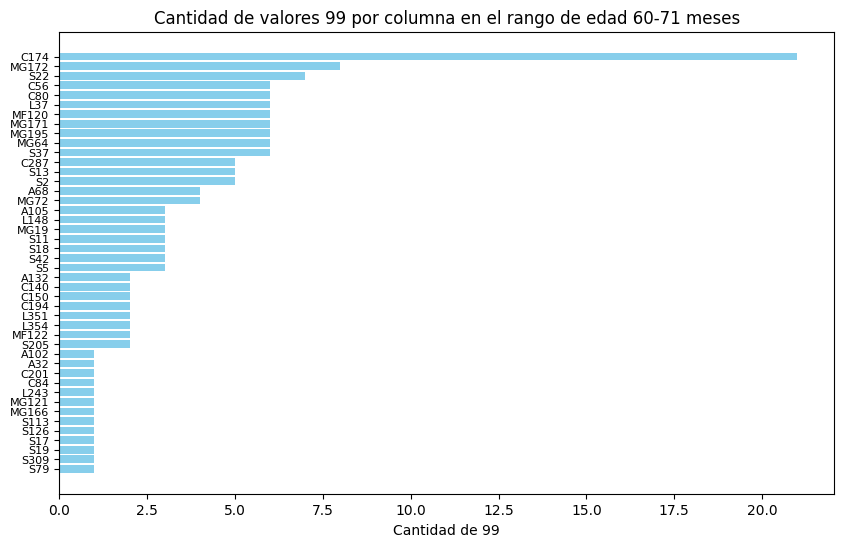

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo para el rango de edad 20
archivo = "datos_edad_20.xlsx"
df = pd.read_excel(archivo)

# Diccionario para almacenar el conteo de 99 por columna
resultados = []

# Recorre las columnas del DataFrame
for columna in df.columns:
    # Total de respuestas: celdas no vacías en la columna
    total_respuestas = df[columna].notna().sum()
    # Conteo de celdas que contienen el valor 99
    count_99 = (df[columna] == 99).sum()
    
    # Solo agregar al listado si hay al menos un 99
    if count_99 > 0:
        # Calcular el porcentaje respecto al total de respuestas
        porcentaje = (count_99 / total_respuestas * 100) if total_respuestas > 0 else 0
        resultados.append((columna, count_99, total_respuestas, porcentaje))

# Ordenar los resultados por cantidad de 99 de mayor a menor
resultados.sort(key=lambda x: x[1], reverse=True)

# Extraer los datos para graficar
columnas = [x[0] for x in resultados]
conteo_99 = [x[1] for x in resultados]

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(columnas, conteo_99, color='skyblue')
plt.xlabel('Cantidad de 99')
plt.title('Cantidad de valores 99 por columna en el rango de edad 60-71 meses')
plt.gca().invert_yaxis()  # Para que la columna con más 99 aparezca arriba

# Reducir tamaño del texto en el eje vertical
plt.yticks(fontsize=8)

plt.show()


In [19]:
import pandas as pd

# Cargar el archivo para el rango de edad 20
archivo = "datos_edad_20.xlsx"
df = pd.read_excel(archivo)

# Diccionario para almacenar el conteo de 99 por columna
resultados = []

# Recorre las columnas del DataFrame
for columna in df.columns:
    # Total de respuestas: celdas no vacías en la columna
    total_respuestas = df[columna].notna().sum()
    # Conteo de celdas que contienen el valor 99
    count_99 = (df[columna] == 99).sum()
    # Respuestas diferentes de 99 y NaN
    valid_responses = df[columna].apply(lambda x: x != 99 and pd.notna(x)).sum()
    
    # Solo agregar al listado si hay al menos un 99 o respuestas válidas
    if count_99 > 0 or valid_responses > 0:
        # Calcular el porcentaje respecto al total de respuestas
        porcentaje = (count_99 / total_respuestas * 100) if total_respuestas > 0 else 0
        resultados.append((columna, count_99, valid_responses, total_respuestas, porcentaje))

# Ordenar los resultados por cantidad de 99 de mayor a menor
resultados.sort(key=lambda x: x[1], reverse=True)

# Imprimir los resultados
print(f"{'Columna':<30} {'Cantidad de 99':<20} {'Respuestas Válidas':<20} {'Total Respuestas':<20} {'Porcentaje (%)'}")
print("="*90)
for columna, count_99, valid_responses, total_respuestas, porcentaje in resultados:
    print(f"{columna:<30} {count_99:<20} {valid_responses:<20} {total_respuestas:<20} {porcentaje:.2f}")



Columna                        Cantidad de 99       Respuestas Válidas   Total Respuestas     Porcentaje (%)
C174                           21                   74                   95                   22.11
MG172                          8                    87                   95                   8.42
S22                            7                    93                   100                  7.00
C56                            6                    89                   95                   6.32
C80                            6                    89                   95                   6.32
L37                            6                    92                   98                   6.12
MF120                          6                    89                   95                   6.32
MG171                          6                    90                   96                   6.25
MG195                          6                    89                   95                   6.32

Eliminación de columnas con menos del 80% de respuestas válidas: Esto garantiza que solo las características con información suficiente sean consideradas en el análisis, evitando incluir columnas con demasiados valores faltantes.

Eliminación de columnas con solo una respuesta válida: Estas columnas no ofrecen variabilidad y, por tanto, no contribuyen significativamente al modelo de aprendizaje.

In [20]:
import pandas as pd
import os

# Cargar el archivo para el rango de edad 20
archivo = "datos_edad_20.xlsx"
df = pd.read_excel(archivo)

# Umbral de respuestas válidas (80%)
umbral_respuestas = 0.8 * len(df)

# Filtrar las columnas que no cumplan con el criterio de respuestas válidas
df_preprocesado = df.loc[:, df.notna().sum() > umbral_respuestas]

# Eliminar columnas que solo tengan una respuesta válida
df_preprocesado = df_preprocesado.loc[:, df_preprocesado.apply(lambda x: x.nunique() > 1)]

# Imprimir las columnas que han sido eliminadas y las que se mantienen
print("Columnas eliminadas por tener menos del 80% de respuestas válidas o solo una respuesta única:")
eliminadas = set(df.columns) - set(df_preprocesado.columns)
print(eliminadas)

# Mostrar las primeras filas del DataFrame preprocesado
print("\nDataFrame preprocesado:")
print(df_preprocesado.head())

# Crear una carpeta para guardar el archivo preprocesado si no existe
carpeta_salida = "preprocesado"
if not os.path.exists(carpeta_salida):
    os.makedirs(carpeta_salida)

# Definir el nombre del archivo de salida
nombre_archivo_salida = os.path.join(carpeta_salida, "datos_edad_20_preprocesado.xlsx")

# Guardar el DataFrame preprocesado en un nuevo archivo Excel
df_preprocesado.to_excel(nombre_archivo_salida, index=False)

print(f"\nArchivo preprocesado guardado en: {nombre_archivo_salida}")


Columnas eliminadas por tener menos del 80% de respuestas válidas o solo una respuesta única:
{'C104', 'L340', 'C256', 'A65', 'S180', 'MF143', 'A7', 'C304', 'C175', 'S221', 'C324', 'L38', 'L164', 'A10', 'A31', 'MF63', 'C310', 'S57', 'EdadCronológica', 'L242', 'L41', 'EdadCodif', 'A202', 'C106', 'Motivovaloración', 'MF58', 'L353', 'MG85', 'MF250', 'Progreso', 'MF144', 'A9', 'MG170', 'A4', 'MG165', 'L134', 'Observacionesescolarización', 'A66', 'C302', 'MG62', 'C259', 'Rangoedad', 'S27', 'C312', 'L203', 'C263', 'CMF105_2', 'MF264', 'A156', 'L287', 'S198', 'Nhermanos', 'C112', 'C290', 'A15', 'ResultadotestApgar', 'L8', 'A201', 'L327', 'C311', 'Edadpadre', 'Familiaresdomicilio', 'MF195', 'S65', 'S10', 'Edadmadre', 'S224', 'C26', 'C313', 'C8', 'A1', 'A8', 'MF62', 'C261', 'L195', 'L223', 'C262', 'L173', 'C316', 'ObservacionesJuicioclínico', 'A12', 'A107', 'C15', 'A198', 'C59', 'L136', 'S220', 'C303', 'L113', 'L272', 'C364', 'Posiciónhermanos', 'Enfermedadesrelevantes', 'C315', 'S103', 'C101',

Moda: En datos binarios (1 o 0), la moda es una manera sencilla y lógica de reemplazar valores faltantes, ya que mantiene la coherencia del patrón de respuestas. Si la mayoría de las respuestas en una columna son 1 o 0, se mantiene la representación mayoritaria.

In [22]:
import pandas as pd

# Cargar el archivo
archivo = "preprocesado/datos_edad_20_preprocesado.xlsx"
df = pd.read_excel(archivo)

# Reemplazar 99 con NaN (si 99 es considerado un valor faltante)
df.replace(99, pd.NA, inplace=True)

# Rellenar los NaN con la moda de cada columna (1 o 0)
for columna in df.columns:
    if df[columna].isna().sum() > 0:  # Si hay valores NaN
        moda = df[columna].mode()[0]  # Obtener la moda (1 o 0)
        df[columna].fillna(moda, inplace=True)  # Rellenar NaN con la moda (1 o 0)

# Guardar el archivo con los valores reemplazados
df.to_excel('preprocesado/datos_preprocesado_moda.xlsx', index=False)


C:\Users\alber\AppData\Local\Temp\ipykernel_11288\671053282.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columna].fillna(moda, inplace=True)  # Rellenar NaN con la moda (1 o 0)
C:\Users\alber\AppData\Local\Temp\ipykernel_11288\671053282.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columna]

Detectamos variables binarias

In [40]:
import pandas as pd

# Cargar los datos
archivo = "preprocesado/datos_preprocesado_moda.xlsx"
df = pd.read_excel(archivo)

# Verificar las columnas presentes
print("Columnas del DataFrame:", df.columns)

# Identificar las columnas categóricas binarias
binary_categorical_columns = []

# Recorremos las columnas del DataFrame
for columna in df.columns:
    # Si la columna es categórica (tipo 'object' o 'category')
    if df[columna].dtype == 'object' or df[columna].dtype.name == 'category':
        # Comprobamos si la columna tiene exactamente dos valores únicos
        if len(df[columna].unique()) == 2:
            binary_categorical_columns.append(columna)

# Verificar las columnas binarias categóricas
print("Columnas categóricas binarias detectadas:", binary_categorical_columns)

# Aplicar One-Hot Encoding solo en las columnas categóricas binarias
df_encoded = pd.get_dummies(df, columns=binary_categorical_columns, drop_first=True)
# Casteamos a entero (1/0)
# Identificar las nuevas columnas generadas por One-Hot Encoding
encoded_binary_columns = [col for col in df_encoded.columns if any(col.startswith(bcol) for bcol in binary_categorical_columns)]

# Casteamos las columnas binarias generadas por One-Hot Encoding a 1/0
df_encoded[encoded_binary_columns] = df_encoded[encoded_binary_columns].astype(int)

# Verificar las columnas después del One-Hot Encoding
print("Columnas después del One-Hot Encoding:", df_encoded.columns)

# Guardar el archivo modificado
df_encoded.to_excel('preprocesado/datos_preprocesado_binarias_categoricas.xlsx', index=False)

print("One-Hot Encoding aplicado a las columnas categóricas binarias.")

Columnas del DataFrame: Index(['testID', 'MenorID', 'A102', 'A105', 'A132', 'A140', 'A142', 'A32',
       'A325', 'A326', 'A68', 'A69', 'A99', 'CA186', 'C140', 'C150', 'C174',
       'C194', 'C195', 'C201', 'C287', 'C56', 'C80', 'C84', 'C92', 'L121',
       'L148', 'L167', 'L241', 'L243', 'L351', 'L354', 'L37', 'MF120', 'MF122',
       'MF59', 'MF60', 'MF78', 'MG171', 'MG172', 'MG19', 'MG195', 'MG64',
       'MG72', 'S11', 'S113', 'S124', 'S126', 'S13', 'S14', 'S142', 'S17',
       'S18', 'S19', 'S191', 'S194', 'S2', 'S20', 'S205', 'S21', 'S22', 'S309',
       'S37', 'S42', 'S5', 'S6', 'S74', 'S76', 'S79', 'S9', 'S91', 'Alta',
       'EdadEvolutiva', 'Áreasactivas', 'Tipoprofesional', 'Referenciamenor',
       'ResponsableId', 'Fechanacimiento', 'Ntests', 'Ntestscompletados',
       'Sexo', 'Códigopostal', 'Trabajopadre', 'Trabajomadre',
       'Nivelestudiospadre', 'Nivelestudiosmadre', 'Estadocivilpadres',
       'Tipoparto', 'Situacionsocioeconómica', 'Antecedentesfamiliares',
     

Vemos que valores tienen las columnas categoricas para codificarlos

In [5]:
import pandas as pd

# Cargar el archivo
archivo = "preprocesado/datos_preprocesado_binarias_categoricas.xlsx"
df = pd.read_excel(archivo)

# Identificar columnas categóricas (tipo 'object' o 'category')
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype.name == 'category']

# Mostrar los valores únicos y su frecuencia para cada columna categórica
for col in categorical_columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts(dropna=False))


Columna: Alta
Alta
2018-09-18 19:35:23    1
2018-10-16 11:39:02    1
2018-10-16 11:38:08    1
2018-10-17 13:03:36    1
2018-10-19 18:18:23    1
                      ..
2022-03-21 11:53:34    1
2022-04-01 09:36:55    1
2022-04-01 09:44:42    1
2022-04-28 10:58:31    1
2022-04-28 11:32:32    1
Name: count, Length: 115, dtype: int64

Columna: EdadEvolutiva
EdadEvolutiva
60-71 meses    110
72-84 meses      4
48-59 meses      1
Name: count, dtype: int64

Columna: Tipoprofesional
Tipoprofesional
Otros/as                                       34
No informado                                   31
Psicólogo/a                                    20
Orientador/a                                   19
Educadores,Maestros/as,Psicopedagogos/as...    11
Name: count, dtype: int64

Columna: Referenciamenor
Referenciamenor
31234567 - 1     7
44370630-1       6
73779574-1       1
48828938-2       1
AN 1416510612    1
                ..
44370743-2       1
30815373-1       1
45740225-2       1
31007476-2    

Las columnas:
- Alta
- Fechanacimiento
- Referenciamenor
- ResponsableId
- Codigo Postal

No aportan valor predictivo al modelo, por lo que deberían ser eliminadas.

Además, codificamos la edad evolutiva igual que la edad cronologica para tener unos valores continuos

In [6]:
import pandas as pd

# Cargar el archivo
archivo = "preprocesado/datos_preprocesado_binarias_categoricas.xlsx"
df = pd.read_excel(archivo)

# Eliminar columnas irrelevantes
columnas_a_eliminar = ['Alta', 'Referenciamenor', 'Fechanacimiento', 'ResponsableId', 'Códigopostal']
df = df.drop(columns=columnas_a_eliminar)

# Codificar EdadEvolutiva
rangos_edad = {
    "primer mes": 0,
    "segundo mes": 1,
    "tercer mes": 2,
    "cuarto mes": 3,
    "quinto mes": 4,
    "sexto mes": 5,
    "séptimo mes": 6,
    "octavo mes": 7,
    "noveno mes": 8,
    "décimo mes": 9,
    "undécimo me": 10,
    "doce meses": 11,
    "12-15 meses": 12,
    "15-18 meses": 13,
    "18-21 meses": 14,
    "21-24 meses": 15,
    "24-30 meses": 16,
    "30-36 meses": 17,
    "36-48 meses": 18,
    "48-59 meses": 19,
    "60-71 meses": 20,
    "72-84 meses": 21
}
df['EdadEvolutiva'] = df['EdadEvolutiva'].map(rangos_edad)

# One-hot encoding para las columnas categóricas
categorical_columns = [
    'Tipoprofesional', 'Trabajopadre', 'Trabajomadre', 
    'Nivelestudiospadre', 'Nivelestudiosmadre', 
    'Estadocivilpadres', 'Tipoparto', 'Situacionsocioeconómica', 
    'Antecedentesfamiliares', 'Nivelescolarización'
]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Convertir las columnas one-hot a tipo numérico (1 y 0)
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Guardar el archivo modificado
df.to_excel('preprocesado/datos_preprocesado_moda_codificado_numerico_total.xlsx', index=False)

print("Script ejecutado: columnas eliminadas, edad evolutiva codificada, one-hot encoding aplicado a todas las columnas categóricas y convertido a formato numérico.")


Script ejecutado: columnas eliminadas, edad evolutiva codificada, one-hot encoding aplicado a todas las columnas categóricas y convertido a formato numérico.


Probamos a quedarnos con un fichero con solamente las preguntas del test DAUCO

Columnas DAUCO seleccionadas (68):
['A102', 'A105', 'A132', 'A140', 'A142', 'A32', 'A325', 'A326', 'A68', 'A69', 'A99', 'C140', 'C150', 'C174', 'C194', 'C195', 'C201', 'C287', 'C56', 'C80', 'C84', 'C92', 'L121', 'L148', 'L167', 'L241', 'L243', 'L351', 'L354', 'L37', 'MF120', 'MF122', 'MF59', 'MF60', 'MF78', 'MG171', 'MG172', 'MG19', 'MG195', 'MG64', 'MG72', 'S11', 'S113', 'S124', 'S126', 'S13', 'S14', 'S142', 'S17', 'S18', 'S19', 'S191', 'S194', 'S2', 'S20', 'S205', 'S21', 'S22', 'S309', 'S37', 'S42', 'S5', 'S6', 'S74', 'S76', 'S79', 'S9', 'S91']

Vista previa de los datos:
   A102  A105  A132  A140  A142  A32  A325  A326  A68  A69  ...  S309  S37  \
0     1     1     1     1     1    1     1     1    1    1  ...     1    1   
1     1     1     1     1     1    1     1     1    1    1  ...     1    1   
2     1     1     1     1     1    1     1     1    1    1  ...     1    1   
3     1     1     1     1     1    1     1     1    1    1  ...     1    1   
4     1     0     1     1    

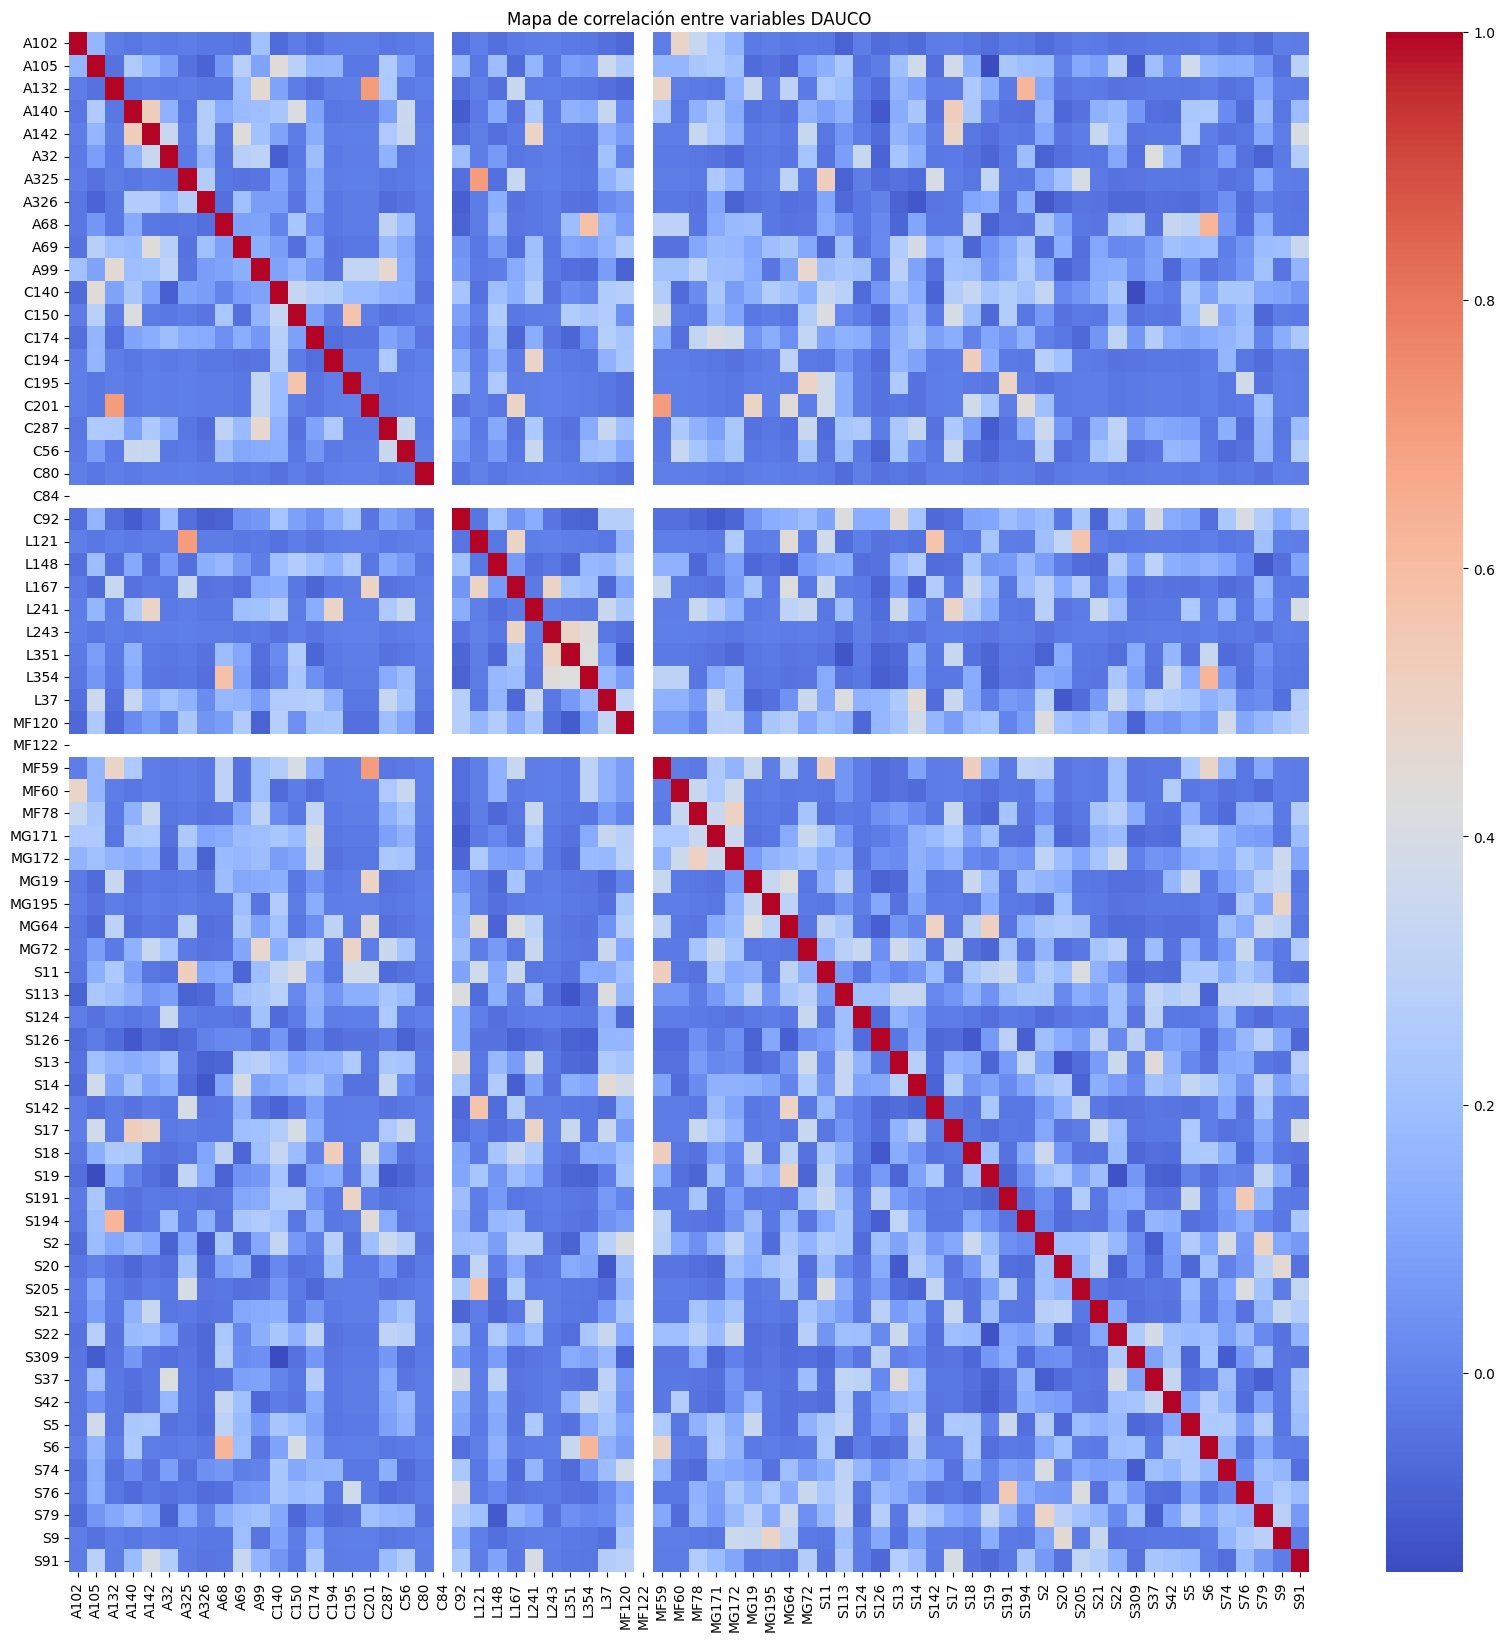

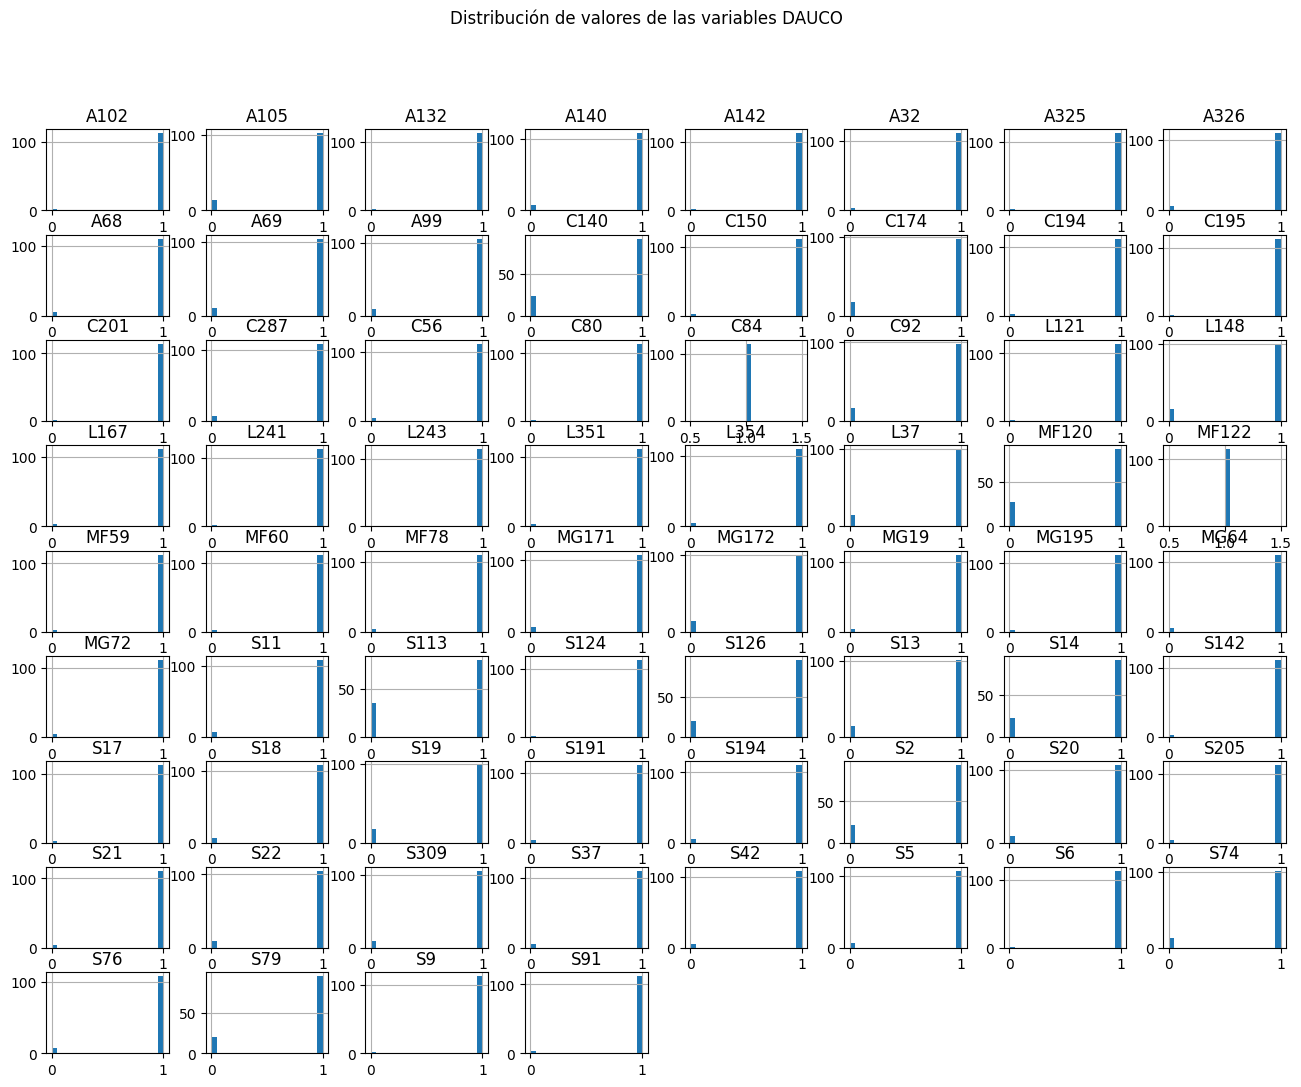

Archivo Excel con columnas DAUCO guardado en preprocesado/datos_dauco_solo.xlsx.


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Cargar los datos
archivo = "preprocesado/datos_preprocesado_moda_codificado_numerico_total.xlsx"
df = pd.read_excel(archivo)

# Definir columnas relacionadas con el test DAUCO (ajusta según necesites)
dauco_columns = [col for col in df.columns if re.match(r'^(L|C|A|MF|MG|S)\d+', col)]
# Filtrar DataFrame
df_dauco = df[dauco_columns]

# Mostrar información previa
print(f"Columnas DAUCO seleccionadas ({len(dauco_columns)}):")
print(dauco_columns)
print("\nVista previa de los datos:")
print(df_dauco.head())

# PEARSON
# Visualización: heatmap de correlaciones para detectar patrones
plt.figure(figsize=(20, 20))
sns.heatmap(df_dauco.corr(), cmap="coolwarm", annot=False)
plt.title("Mapa de correlación entre variables DAUCO")
plt.show()

# También: distribución de valores de algunas columnas de ejemplo
df_dauco.hist(figsize=(16, 12), bins=20)
plt.suptitle("Distribución de valores de las variables DAUCO")
plt.show()

# Guardar el archivo
df_dauco.to_excel("preprocesado/datos_dauco_solo.xlsx", index=False)
print("Archivo Excel con columnas DAUCO guardado en preprocesado/datos_dauco_solo.xlsx.")


Cada columna es una pregunta del test.

Cada fila es un niño/observación.

El coeficiente te dice si los niños que puntúan alto en la pregunta A102, por ejemplo, también tienden a puntuar alto en C201 (o bajo, o sin relación).

No existe variabilidad en las preguntas a esta población de MF122 ni C84 --> Procedemos a eliminarlas

In [16]:
import pandas as pd

# Cargar el archivo de datos
df = pd.read_excel('preprocesado/datos_preprocesado_moda_codificado_numerico_total.xlsx')

# Eliminar columnas donde todos los valores son 1
df_cleaned = df.loc[:, (df != 1).any(axis=0)]

# Guardar el DataFrame limpio
df_cleaned.to_excel('preprocesado/datos_dauco_variables.xlsx', index=False)

# Mostrar las primeras filas del DataFrame limpio
print(df_cleaned.head())

   testID  MenorID  A102  A105  A132  A140  A142  A32  A325  A326  ...  \
0      79       96     1     1     1     1     1    1     1     1  ...   
1     125      120     1     1     1     1     1    1     1     1  ...   
2     107      126     1     1     1     1     1    1     1     1  ...   
3     168      182     1     1     1     1     1    1     1     1  ...   
4     255      331     1     0     1     1     1    1     1     1  ...   

   Situacionsocioeconómica_Medio baja  Situacionsocioeconómica_No informado  \
0                                   0                                     0   
1                                   1                                     0   
2                                   0                                     0   
3                                   0                                     0   
4                                   0                                     0   

   Antecedentesfamiliares_Ninguno de los anteriores  \
0                        

Columnas DAUCO seleccionadas (66):
['A102', 'A105', 'A132', 'A140', 'A142', 'A32', 'A325', 'A326', 'A68', 'A69', 'A99', 'C140', 'C150', 'C174', 'C194', 'C195', 'C201', 'C287', 'C56', 'C80', 'C92', 'L121', 'L148', 'L167', 'L241', 'L243', 'L351', 'L354', 'L37', 'MF120', 'MF59', 'MF60', 'MF78', 'MG171', 'MG172', 'MG19', 'MG195', 'MG64', 'MG72', 'S11', 'S113', 'S124', 'S126', 'S13', 'S14', 'S142', 'S17', 'S18', 'S19', 'S191', 'S194', 'S2', 'S20', 'S205', 'S21', 'S22', 'S309', 'S37', 'S42', 'S5', 'S6', 'S74', 'S76', 'S79', 'S9', 'S91']

Vista previa de los datos:
   A102  A105  A132  A140  A142  A32  A325  A326  A68  A69  ...  S309  S37  \
0     1     1     1     1     1    1     1     1    1    1  ...     1    1   
1     1     1     1     1     1    1     1     1    1    1  ...     1    1   
2     1     1     1     1     1    1     1     1    1    1  ...     1    1   
3     1     1     1     1     1    1     1     1    1    1  ...     1    1   
4     1     0     1     1     1    1     1   

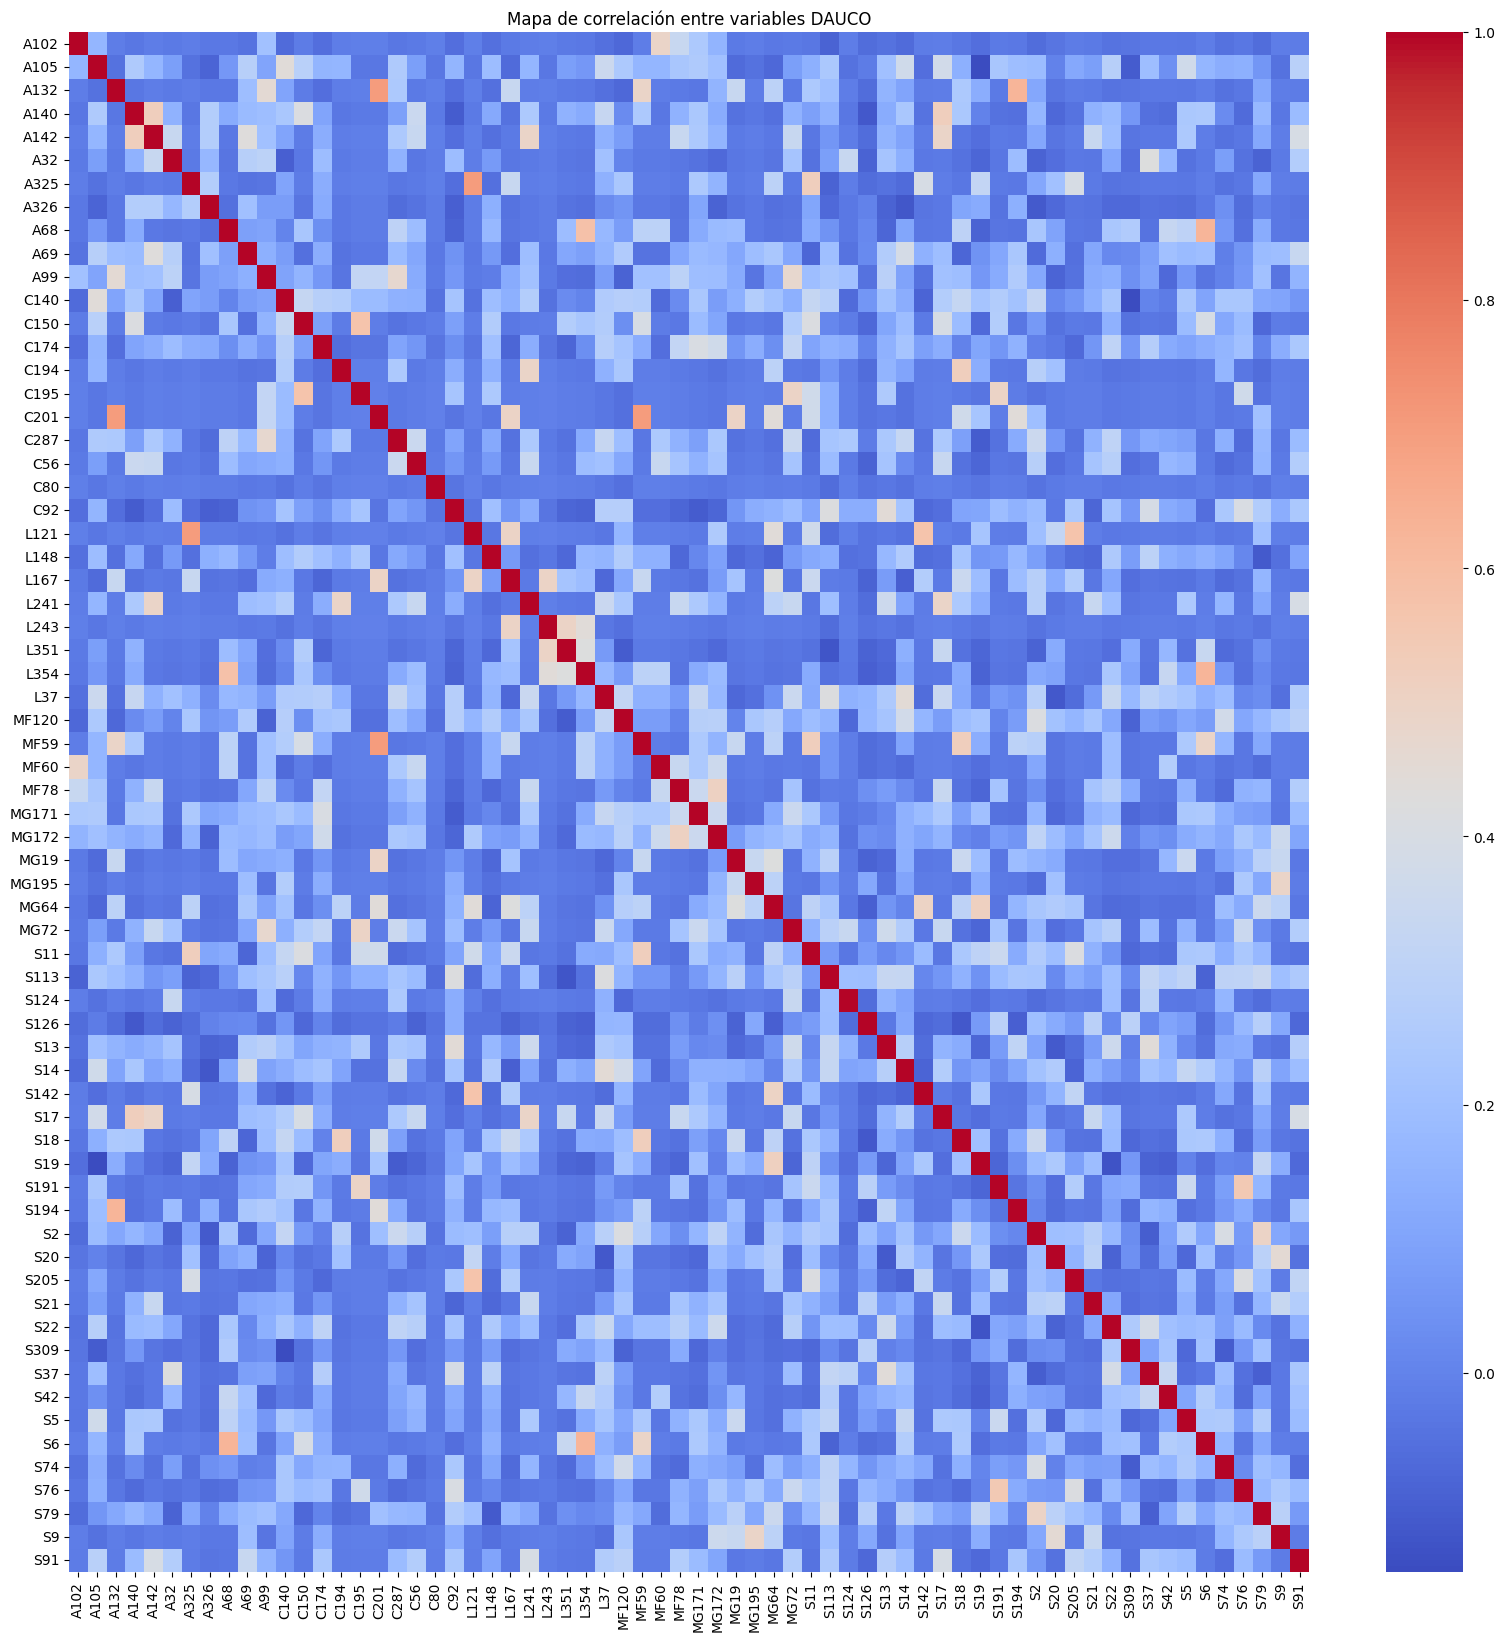

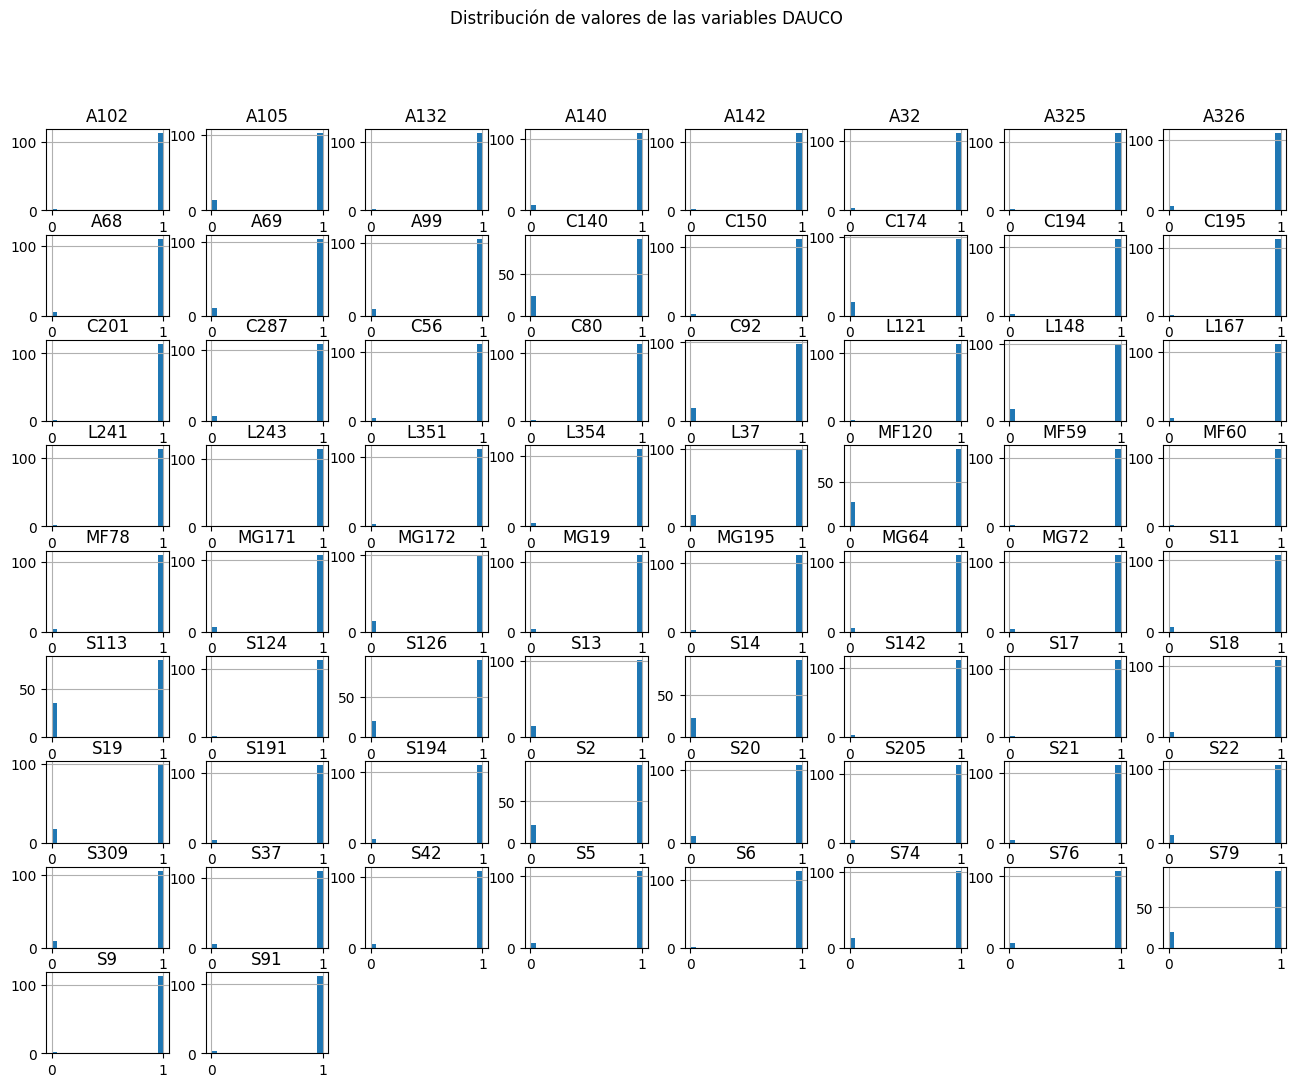

Archivo Excel con columnas DAUCO guardado en preprocesado/datos_dauco_solo.xlsx.


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Cargar los datos
archivo = "preprocesado/datos_dauco_variables.xlsx"
df = pd.read_excel(archivo)

# Definir columnas relacionadas con el test DAUCO (ajusta según necesites)
dauco_columns = [col for col in df.columns if re.match(r'^(L|C|A|MF|MG|S)\d+', col)]
# Filtrar DataFrame
df_dauco = df[dauco_columns]

# Mostrar información previa
print(f"Columnas DAUCO seleccionadas ({len(dauco_columns)}):")
print(dauco_columns)
print("\nVista previa de los datos:")
print(df_dauco.head())

# PEARSON
# Visualización: heatmap de correlaciones para detectar patrones
plt.figure(figsize=(20, 20))
sns.heatmap(df_dauco.corr(), cmap="coolwarm", annot=False)
plt.title("Mapa de correlación entre variables DAUCO")
plt.show()

# También: distribución de valores de algunas columnas de ejemplo
df_dauco.hist(figsize=(16, 12), bins=20)
plt.suptitle("Distribución de valores de las variables DAUCO")
plt.show()

# Guardar el archivo
df_dauco.to_excel("preprocesado/datos_dauco_solo.xlsx", index=False)
print("Archivo Excel con columnas DAUCO guardado en preprocesado/datos_dauco_solo.xlsx.")